<a href="https://colab.research.google.com/github/Bubukisapisa/ML_education/blob/main/HW_2_1_%D0%90%D0%BD%D0%B0%D0%BB%D1%96%D0%B7_%D0%BE%D0%B7%D0%BD%D0%B0%D0%BA_%D0%B4%D0%BB%D1%8F_%D0%BF%D0%BE%D0%B1%D1%83%D0%B4%D0%BE%D0%B2%D0%B8_%D0%BB%D1%96%D0%BD%D1%96%D0%B8%CC%86%D0%BD%D0%BE%D1%97_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [2]:
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
medical_df = pd.read_csv('drive/MyDrive/ML for people/medical-charges.csv')
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


1. Проаналізувати які колонки мають кореляцію з charges (н-лад в лекції було вказано, що колонка кількості дітей немає сильного впливу на charges)
2.Використовуючи кореляцію та графіки оцінити наскільки значний вплив мають певні фічі на таргет (як саме оцінитии цей вплив і трансформувати його в певний коефіцієнт не придумав).
3.Останнім кроком зробити шаблон де буде задаватись прогнозна ціна (н-лад є якесь мінім значення charges до якого додаєм "надбавку" за вік, за індекс маси тіла і тд)
ПС та я по суті описав рівняння лінійоної регресії

**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

In [5]:
!pip install plotly matplotlib seaborn --quiet

In [6]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [7]:
? px.histogram

In [8]:
plot = px.histogram(
    medical_df,
    x = 'charges',
    marginal='box',
    color = 'sex'

)
plot.update_layout(bargap=0.1)
plot.show()

Розподіл значень у чоловіків та жінок дуже схожий, більшість значень сконцентровані в лівій стороні але в чоловіків, судячи з боксплот, все ж частіше високі charges - 3 квартиль правіше і довші вуса

In [9]:
plot = px.histogram(
    medical_df,
    x = 'charges',
    marginal='box',
    color = 'region'

)
plot.update_layout(bargap=0.1)
plot.show()

Розподіл по регіонам також виглядає досить однорідним з концентрацією значень зліва тобто нижчим charges. Боксплот говорить, що медіана у всіх регіонах досить схожа, при цьому в регіоні southeast charges частіше вищі ніж в решті (3ій квартиль правіше праве вусо значно довше). Схожа ситуація в регіоні southwest але значно менш вираженіша.
Можливо, в південних регіонах якийсь специфічний клімат (урагани, повені і тд) що сприяє вищим charges, або інші специфічні обставини (криміногенна ситуація або що)

**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

In [10]:
pl_r = px.histogram(
    medical_df,
    x='region',
    color='smoker'
)
pl_r.show()

В регіоні southeast помітно більша частка курців, можливо вищі charges в цьому регіоні саме через це.

In [15]:
pl_c = px.histogram(
    medical_df,
    x='children',
    color = 'smoker',
    histnorm="percent",
    barmode="relative"
)
pl_c.show()

In [ ]:
там де дітей 2 і 3 курців на 1-2% більше ніж некурців (підвищений стрес?)

**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

In [17]:
plot = px.violin(
    medical_df,
    x='children',
    y='charges'
)
plot.show()

погано розумію цей графік - наче виглядає так що медіана у всіх випадках схожа, більшість значень знаходяться ближче до нижнього порога, у випадку 0 дітей виражена бімодальність, а там де 5 дітей мало даних (графік приплюснутий)

**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [18]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [19]:
def estimate_charges(age, w, b):
    return w * age + b

In [20]:
def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

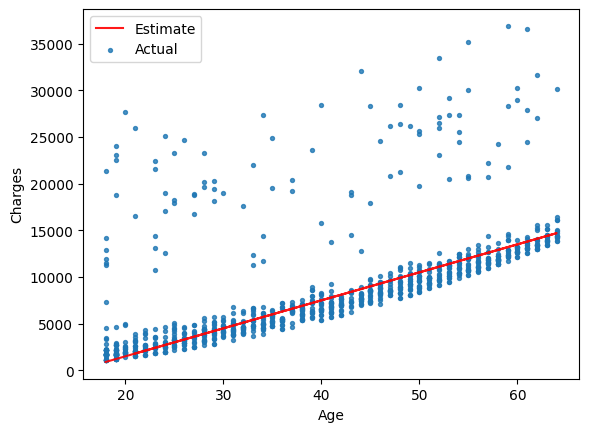

In [42]:
try_parameters(non_smoker_df, 300, -4500)

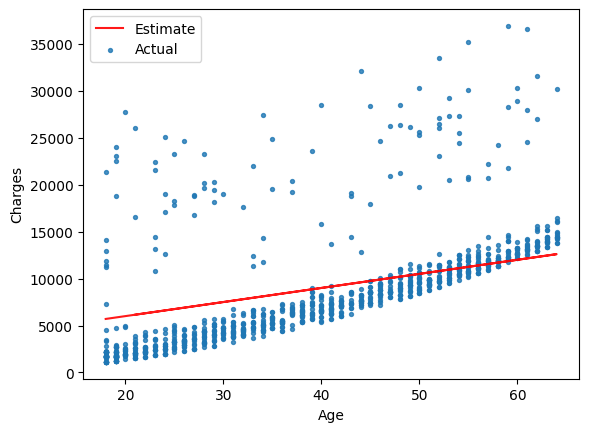

In [24]:
try_parameters(non_smoker_df, 150, 3000)

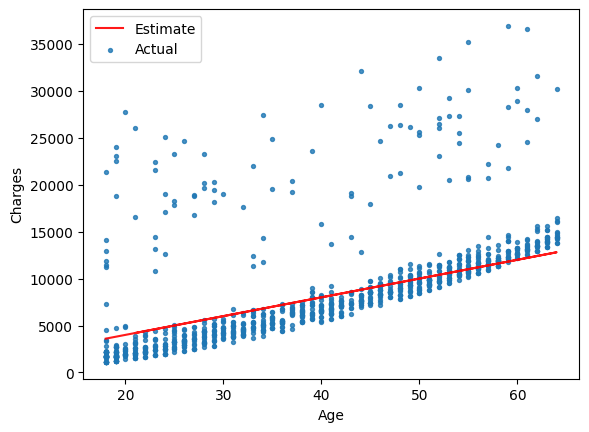

In [38]:
try_parameters(non_smoker_df, 200, 0)

**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [31]:
import numpy as np

In [45]:
def rmse(predict, target):
  return np.sqrt(np.mean(np.square(target - predict)))

In [56]:
targets = non_smoker_df.charges
predictions = estimate_charges(non_smoker_df.age, 300, -3500)
rmse(targets, predictions)

np.float64(4686.746277005344)

In [34]:
predictions = estimate_charges(non_smoker_df.age, 150, 3000)
rmse(targets, predictions)

np.float64(4968.632089242997)

In [50]:
predictions = estimate_charges(non_smoker_df.age, 200, 0)
rmse(targets, predictions)

np.float64(4790.154131157637)

найнижче значення втрат у мене вийшло 4686, що все ще багато.
загальна стратегія була б такою - дивитись величину втрат і коригувати омега, щоб змінювати кут нахилу лінії. Але при збільшенні значення омега графік ще й починає підніматись вгору і тому я беру в одному з кейсів негативне значення b